# 1.1.1

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


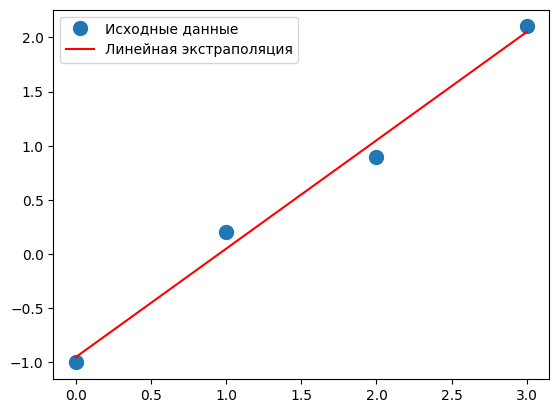

In [69]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

# 1.1.2

[-4.97002241 -4.34170895 -3.1328967  -2.09041714 -0.75090661  0.19581959
  1.342312    1.71451969  3.25279996  3.54123141  4.53699569]


[25.43805808 16.24957084  9.16508436  3.63371406  0.77337704  0.26332717
  0.93451566  3.7852276   9.46926326 16.37077533 24.82008254]


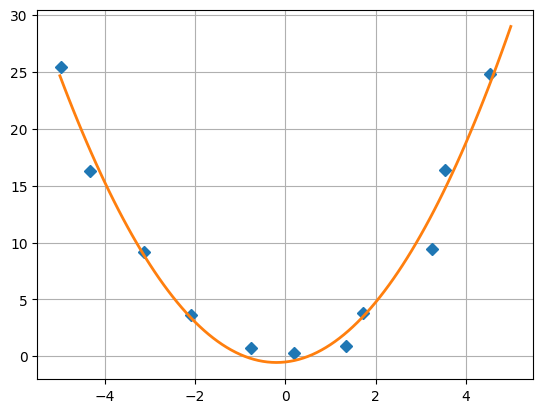

In [70]:
from numpy import *
from numpy.random import *


delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**2, x, ones (11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('Полином 2-й степени.png')

# 1.1.3

[-4.87233334 -3.60962248 -3.49295734 -2.13535145 -1.40903132 -0.22449104
  0.81209511  1.51791233  3.4020721   3.93994551  4.7637422 ]
[-100.15039294  -47.56151605  -18.0169544    -3.79050862    0.41677562
   -0.48439647    2.31259848   12.09616409   35.92706824   80.42990805
  150.19061632]


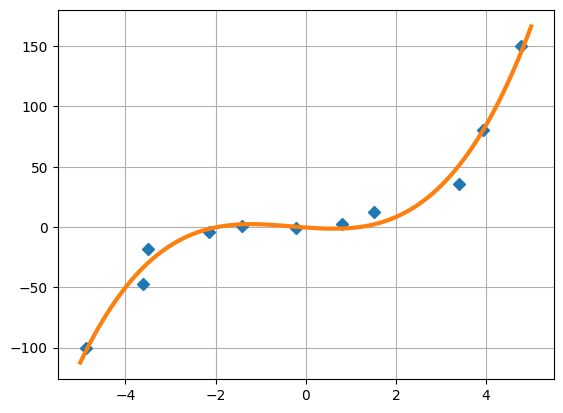

In [71]:
from numpy import *
from numpy.random import *


delta = 1.0
x = linspace(-5,5,11)
y = x**3 + x**2 + delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**3, x**2, x, ones (11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x,y,'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('Полином 3-й степени.png')

[-5.12147318 -4.04444159 -3.09831866 -2.11181107 -1.22489604 -0.40069073
  1.16854005  2.48135773  3.39461073  4.14767751  4.98258144]


[-4.82470449 -3.67978894 -2.87776485 -1.50897869 -1.00582159  0.4665351
  0.62329187  1.83952338  3.4139753   3.54539237  4.56335094]


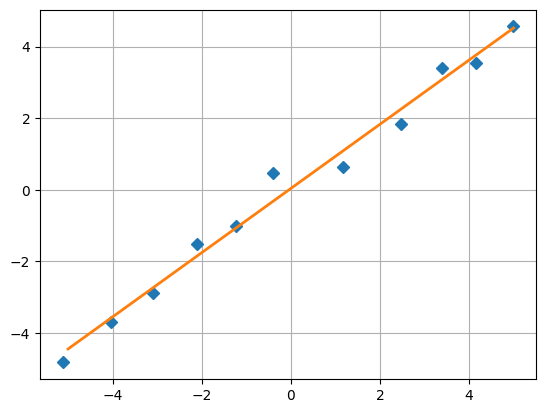

In [72]:
from numpy import *
from numpy.random import *


delta = 1.0
x = linspace(-5,5,11)
y = x + delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x, ones (11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5,5,101)
plt.plot(x, y,'D')

plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)
plt.grid()
plt.savefig('Полином 1-й степени.png')

# 1.1.4

0.0001955561023829056
0.10253186235087787


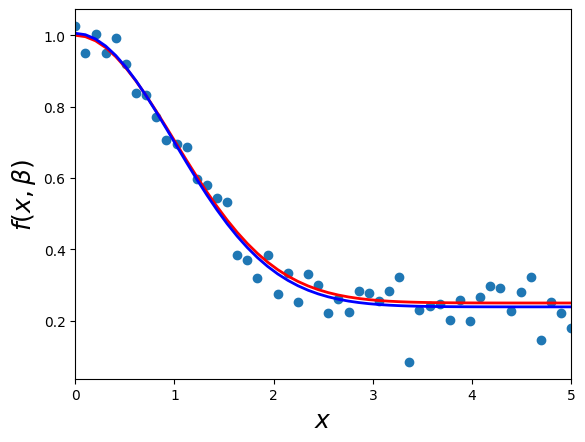

In [73]:
from scipy.optimize import curve_fit
import scipy as sp


beta = (0.25,0.75,0.5)


def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)


xdata = np.linspace(0,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 *np.random.randn(len(xdata))

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

# 1.1.5

[0.2441149  0.74945657]
0.0001712709819888604
0.15060034777944625


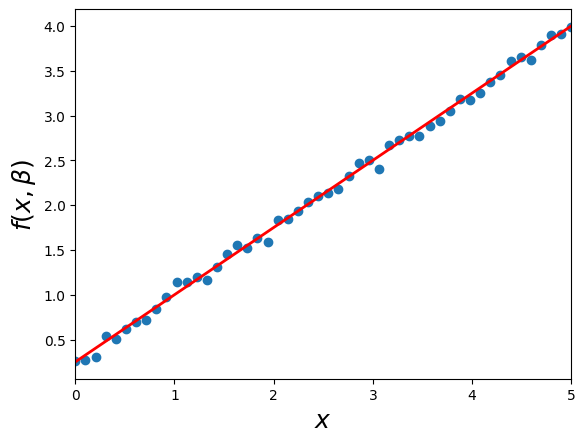

In [74]:
beta = (0.25,0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize=18)
plt.show()

[0.27455982 0.72540458 0.50413897]
0.0001437881509446091
0.1199042618269269


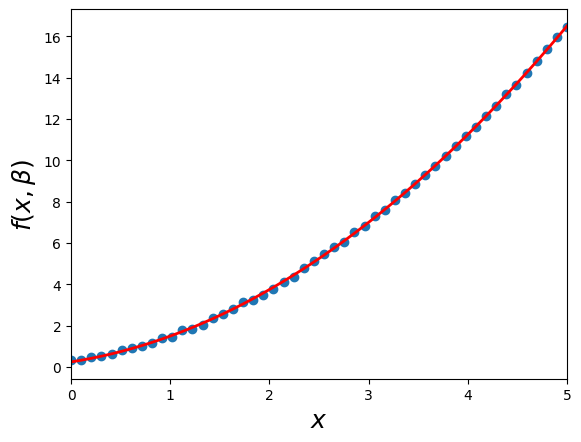

In [75]:
beta = (0.25,0.75,0.5)


def f(x, b0, b1,b2):
    return b0 + b1 * x + b2*x*x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize=18)
plt.show()

[1.00153812 2.00140003]
4.0678850151675314e-05
0.09406746214122438


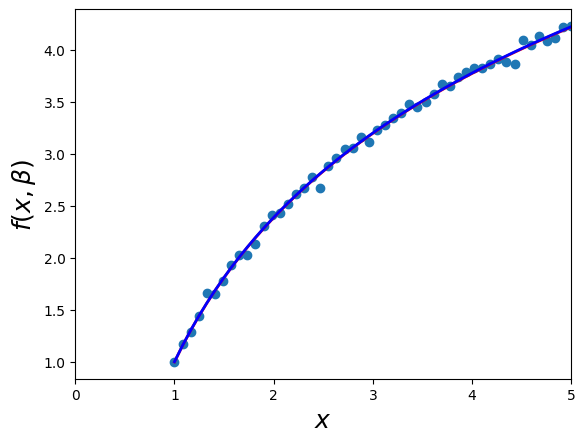

In [76]:
beta = (1,2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize=18)
plt.show()

[1.00325088 1.99774908]
3.891116229697896e-06
0.09152000340909483


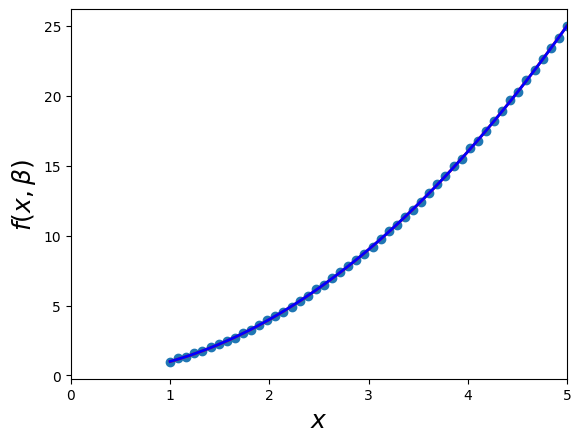

In [77]:
beta = (1,2)


def f(x, b0, b1):
    return b0 * x **b1

xdata = np.linspace(1,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$",fontsize=18)
plt.show()

# 1.2.1

    Учебное время  Оценка
0            0.50      10
1            0.75      22
2            1.00      13
3            1.25      43
4            1.50      20
5            1.75      22
6            1.75      33
7            2.00      50
8            2.25      62
9            2.50      48
10           2.75      55
11           3.00      75
12           3.25      62
13           3.50      73
14           4.00      81
15           4.25      76
16           4.50      64
17           4.75      82
18           5.00      90
19           5.50      93 

(20, 2)


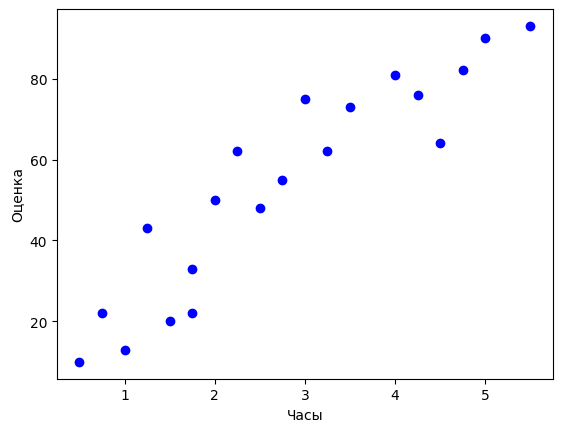

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
                             5.00,5.50],
    'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
        
dataset = pd.DataFrame(my_dict)
dataset.head()
print(dataset,'\n')

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b',label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [79]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


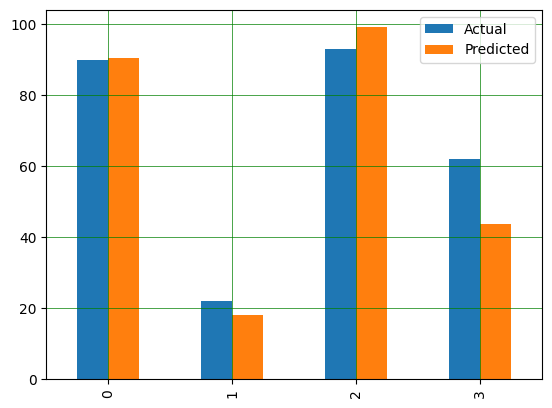

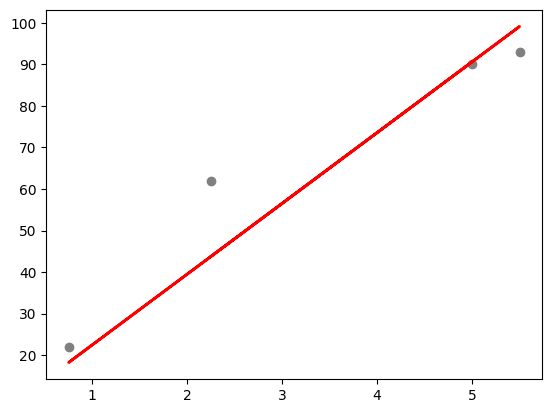

In [80]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5',color='black')
plt.show()

plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red', linewidth=2)
plt.show()

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0 

(30, 2)


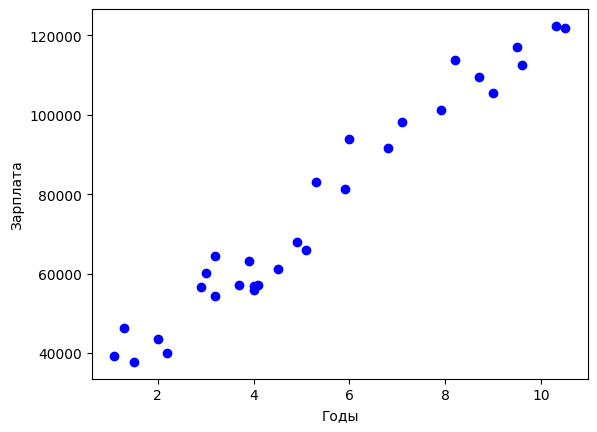

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


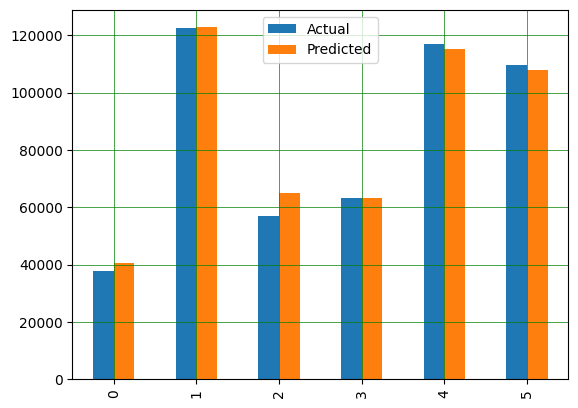

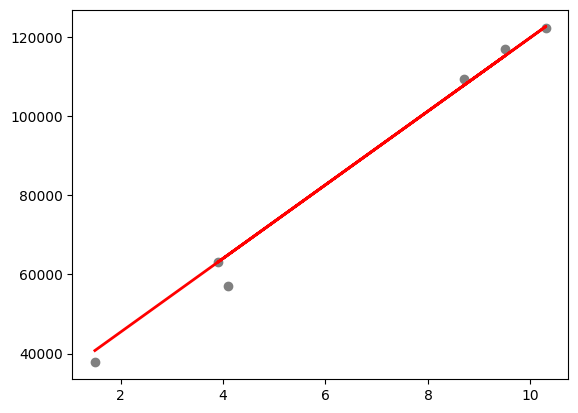

In [81]:
url ='https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)

print(dataset,'\n')
print(dataset.shape)
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b',label = "Данные")
plt.xlabel("Годы")
plt.ylabel("Зарплата")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5',color='black')
plt.show()

plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red', linewidth=2)
plt.show()

# 1.3.1

In [82]:
import numpy as np

Y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X)
X = np.c_[X,np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X,Y,rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


# 1.3.2

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0:'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1:'x2', 2:'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1,df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,1,0.0,2.0,4.0,1.0,5.0,4.0,5.0,9.0,9.0,...,8.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0
1,2,4.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,5.0,...,8.0,7.0,8.0,6.0,8.0,9.0,2.0,1.0,5.0,6.0
2,3,4.0,1.0,2.0,5.0,6.0,7.0,8.0,9.0,7.0,...,4.0,3.0,1.0,2.0,3.0,4.0,1.0,3.0,9.0,7.0
3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [84]:
print(dataset.shape)
dataset.describe()

(4, 24)


,y,x1,x2,x3,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
count,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.00,4.00000,4.000000,4.00000,...,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.500000,2.250000,1.25,2.250000,2.500000,4.000000,4.25,5.00000,6.500000,5.50000,...,5.25000,4.250000,4.000000,3.500000,4.250000,4.750000,2.500000,2.750000,5.000000,4.750000
std,1.290994,2.061553,0.50,1.258306,1.914854,2.160247,2.50,2.94392,3.785939,3.41565,...,3.40343,2.753785,3.559026,2.380476,2.986079,3.304038,2.380476,2.362908,3.265986,2.629956
min,1.000000,0.000000,1.00,1.000000,1.000000,1.000000,1.00,1.00000,1.000000,1.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,0.750000,1.00,1.750000,1.000000,3.250000,3.25,4.00000,5.500000,4.00000,...,3.25000,2.500000,1.000000,1.750000,2.500000,3.250000,1.000000,1.000000,4.000000,4.000000
50%,2.500000,2.500000,1.00,2.000000,2.000000,4.500000,4.50,5.50000,8.000000,6.00000,...,6.00000,4.500000,3.500000,3.500000,4.000000,4.500000,1.500000,2.000000,5.000000,5.500000
75%,3.250000,4.000000,1.25,2.500000,3.500000,5.250000,5.50,6.50000,9.000000,7.50000,...,8.00000,6.250000,6.500000,5.250000,5.750000,6.000000,3.000000,3.750000,6.000000,6.250000
max,4.000000,4.000000,2.00,4.000000,5.000000,6.000000,7.00,8.00000,9.000000,9.00000,...,8.00000,7.000000,8.000000,6.000000,8.000000,9.000000,6.000000,6.000000,9.000000,7.000000


In [85]:
X = dataset[['x1','x2','x3']]
y = dataset['y']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [88]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,-0.327273
x2,-0.272727
x3,-1.018182


In [89]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test,'predicted': y_pred})
df

,Actual,predicted
2,3,2.0


In [90]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 0.9999999999999991


# Задание 1

In [91]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataset = pd.read_csv(url)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[0.7   0.88  0.76  ... 0.51  0.645 0.31 ]


In [92]:
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0:'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1:'x2', 2:'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1,df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3,3
0,0.70,0.0,4.0,4.0,1.0
1,0.88,2.0,1.0,1.0,1.0
2,0.76,4.0,2.0,2.0,1.0


In [93]:
print(dataset.shape)
dataset.describe()

(3, 5)


,y,x1,x2,x3,3
count,3.000000,3.0,3.000000,3.000000,3.0
mean,0.780000,2.0,2.333333,2.333333,1.0
std,0.091652,2.0,1.527525,1.527525,0.0
min,0.700000,0.0,1.000000,1.000000,1.0
25%,0.730000,1.0,1.500000,1.500000,1.0
50%,0.760000,2.0,2.000000,2.000000,1.0
75%,0.820000,3.0,3.000000,3.000000,1.0
max,0.880000,4.0,4.000000,4.000000,1.0


In [94]:
X = dataset[['x1','x2','x3']]
y = dataset['y']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [96]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [97]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.016364
x2,-0.024545
x3,-0.024545


In [98]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test,'predicted': y_pred})
df

,Actual,predicted
2,0.76,0.863636


In [99]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 0.010740495867768596


# Задание 2

[0.  0.2 0.4 0.6 0.8 1. ]
[3. 6. 3. 6. 4. 3.]


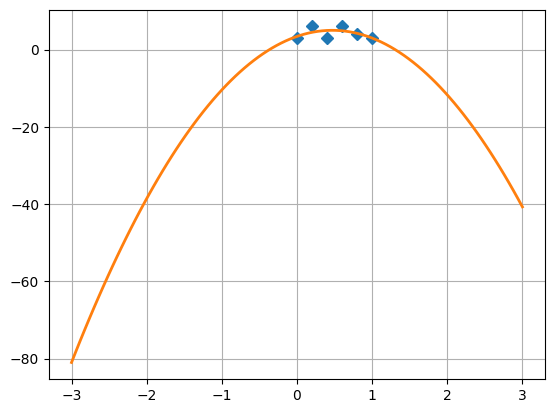

In [100]:
from numpy import *
from numpy.random import *


x = array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = array([3, 6, 3, 6, 4, 3])

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x**2, x, ones (6))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-3,3,100)
plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('Полином 2-й степени.png')

[0.  0.2 0.4 0.6 0.8 1. ]
[5. 5. 4. 4. 6. 6.]


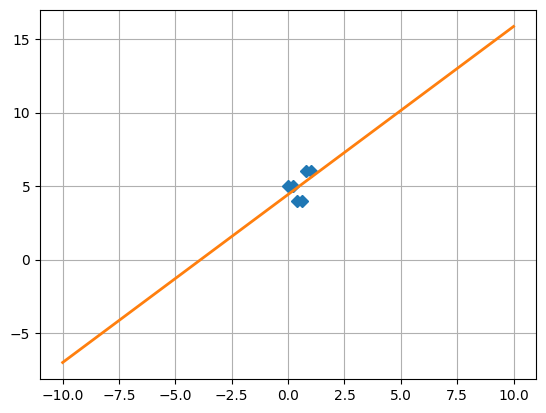

In [101]:
from numpy import *
from numpy.random import *


x = array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = array([5,5,4,4,6,6])

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

m = vstack((x, ones (6))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-10,10,50)
plt.plot(x, y,'D')

plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)
plt.grid()
plt.savefig('Полином 1-й степени.png')